In [17]:
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/srv/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/srv/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/srv/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/srv/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/srv/conda/lib/python3.6/site-packages/t

In [18]:
#Porfin tengo tiempo para comentar, perdonenme las tildes...

#Definimos el prior con las regiones en las que han de estar los parametros
def logprior(v,theta):
    p = -np.inf
    if v > 0 and v<100 and theta<np.pi/2 and theta>0:
        p = 0.0
    return p

#El modelo matematico que sigue la caida libre de un objeto con una velocidad inicial
def modelo(v, theta):
    g = 9.8
    return v**2 * np.sin(2*theta)/g

#Comparacion de la propuesta con los datos experimentales en logaritmo
def loglikelihood(d_obs, sigma_d, v, t):
    d = d_obs -  modelo(v, t)
    d = d/sigma_d
    d = -0.5 * np.sum(d**2)
    return d

#Datos observados
d_obs = np.array([880, 795, 782, 976, 178])
sigma_d = 5.0

#Numero con el que se realizara el MCMH
N = 50000
lista_v = [45]
lista_theta = [np.pi/3]
sigma_v=10
sigma_theta = 1
for i in range(1,N):
    #Proponemos un nuevo v y theta en funcion del anterior mas una distribucion normal
    propuesta_v  = lista_v[i-1] + np.random.normal(loc=0.0, scale=sigma_v)
    propuesta_theta  = lista_theta[i-1] + np.random.normal(loc=0.0, scale=sigma_theta)
    
    #Se creab los Posteriors nuevo, y viejo con los anteriores, con el fin de tener el criterio de comparacion
    logposterior_viejo = loglikelihood(d_obs,sigma_d,lista_v[i-1],lista_theta[i-1]) + logprior(lista_v[i-1],lista_theta[i-1])
    logposterior_nuevo = loglikelihood(d_obs,sigma_d,propuesta_v,propuesta_theta) + logprior(propuesta_v,propuesta_theta)
                      
    #criterio de comparacion
    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    
    #indexamos la propuesta 
    if(alpha<r):
        lista_v.append(propuesta_v)
        lista_theta.append(propuesta_theta)
    #No se indexa e indexamos el anterior
    else:
        lista_v.append(lista_v[i-1])
        lista_theta.append(lista_theta[i-1])

#Convertimos el todo en arrays para poder graficarlo en el histograma
lista_v = np.array(lista_v)
lista_theta = np.array(lista_theta)

#El histograma con los datos de los bins para encontrar el maximo
a, b, c = plt.hist(lista_v, bins=100, density=True)

#Encontramos el maximo del histograma (la maxima probabilidad)
bin_max = np.where(a == a.max())
desv = np.std(lista_v)
mV = np.mean(lista_v)

plt.title('Velocidad de salida '+ str(b[bin_max][0]) + ' m/s. El valor medio es ' + str(mV) + ' m/s. Y la desviacion estandar es ' + str(desv))
#Guardamos la figura
plt.savefig('casiqueno.pdf')

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


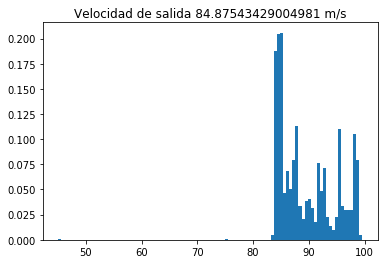